<a href="https://colab.research.google.com/github/Bustagar/APRENDIZAJE-AUTOMATICO-1/blob/main/TP3_AA1_clasificaci%C3%B3n(Resuelto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

Juan Sebastian Bustamante Garcia

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Dataset elegido: https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

## Indicadores:

- Recencia (meses): Tiempo desde la última donación.

- Frecuencia (veces): Cantidad de veces que ha donado sangre.

- Monetario (cc de sangre): Volumen total de sangre donada.

- Tiempo (meses): Periodo de seguimiento en meses.

- Si él/ella donó sangre en marzo de 2007: Indica si la persona realizó una donación en ese mes específico.

## Centro de servicio de transfusión de sangre

In [37]:
# importación de libreria
import pandas as pd

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/Bustagar/APRENDIZAJE-AUTOMATICO-1/refs/heads/main/transfusion.data", delimiter=",")  # Ajusta el delimitador según el formato
df.sample(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
221,4,1,250,4,1
399,21,3,750,26,1
585,2,1,250,2,0
456,21,1,250,21,0
157,2,1,250,2,0


In [39]:
# Renombramos las columnas para un mejor entendimiento
df.rename({
    "Recency (months)": "Recencia (meses)",
    "Frequency (times)": "Frecuencia (veces)",
    "Monetary (c.c. blood)": "Monetario (cc de sangre)",
    "Time (months)": "Tiempo (meses)",
    "whether he/she donated blood in March 2007": "Donó en Marzo de 2007"}, axis=1, inplace=True)

In [40]:
df.head()

,Recencia (meses),Frecuencia (veces),Monetario (cc de sangre),Tiempo (meses),Donó en Marzo de 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## 2.1. Describan las variables (media).

In [41]:
df.describe()

,Recencia (meses),Frecuencia (veces),Monetario (cc de sangre),Tiempo (meses),Donó en Marzo de 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


- Se visualiza lo siguiente de la **media** en las personas que han donado sangre:
-- Hace 9 meses fue la última vez que donaron.
-- Han donado un total de 5 veces.
-- Han donado casi 1400 cc de sangre.
-- Se les ha hecho un seguimiento de 3 años aproximadamente.

## 2.2. Describan las variables (distribución).

## Gráfico histogramas

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

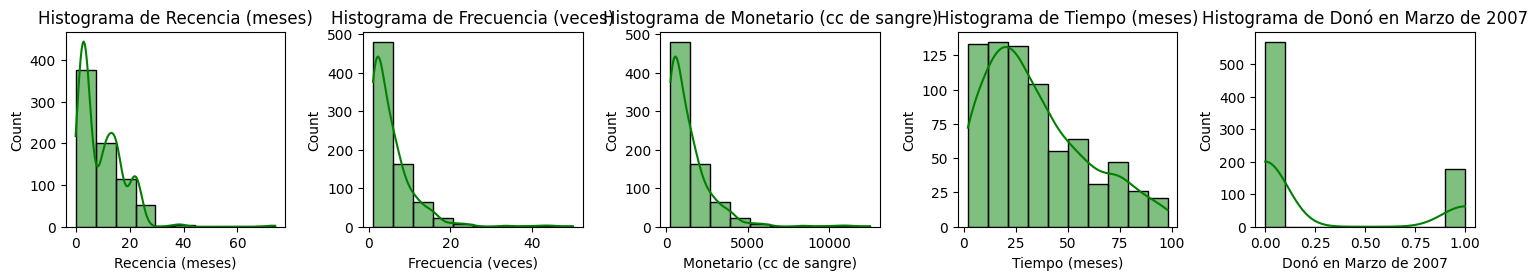

In [43]:
# primero los histogramas... uso un único gráfico para ver todo
plt.figure(figsize=(15, 5))                               # tamaño de la figura

# iterar sobre las columnas para dibujar un histograma para cada una
for i, col in enumerate(df.columns):
  plt.subplot(2, 5, i+1)                                  # 2 filas, 5 columnas, nro de sub-gráfico
  sns.histplot(df[col], kde=True, bins=10, color='green') # histograma + KDE (estimación de densidad)
  plt.title(f'Histograma de { col }')
  plt.tight_layout()                                      # diseño compacto

plt.show()


### Se observa una distribución negativa, lo cual sugiere que los datos estan inclinados a valores bajos.

## Gráfico boxplot


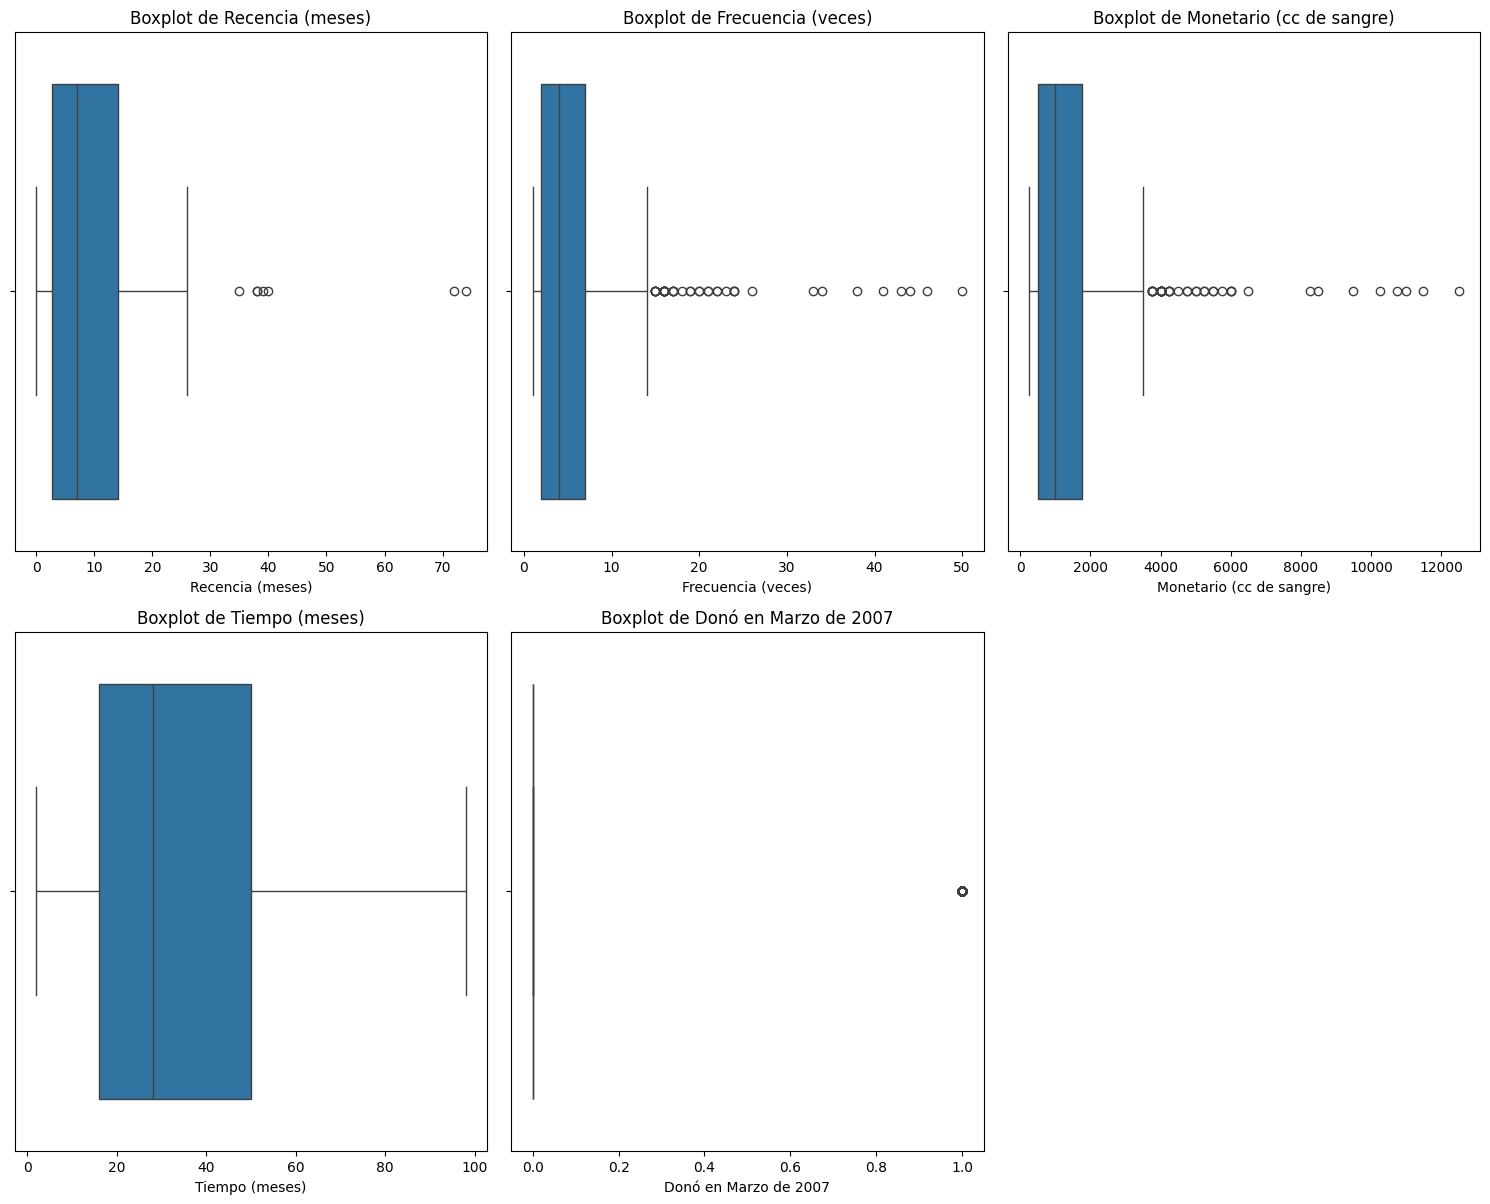

In [44]:
# Número de variables a graficar
num_features = len(df)  # Lista con nombres de las variables
num_cols = 3  # Número de columnas
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de índice
axes = axes.flatten()

# Iterar sobre cada variable y graficar su boxplot
for i, feature in enumerate(df):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f"Boxplot de {feature}")

# Ocultar subgráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gráficos sobrantes

plt.tight_layout()
plt.show()

### Se visualiza que en las 3 primeras columnas tenemos varios valores atípicos, pero normales según el Ministerio de Salud, ya que analizando la columna tiempo (meses), indica cuantos meses se le ha estado haciendo seguimiento al paciente y por la cantidad de tiempo y considerango cuantas donaciones se pueden realizar al año, facilmente pudo haber completado un total de 12 litros de sangre donados.

## Detección de Outliers

In [45]:
# Función para detectar outliers con el método del IQR
def detect_outliers_iqr_all(df):
    outliers_dict = {}  # Creamos un diccionario vacío para almacenar los outliers de cada columna

    for column in df.select_dtypes(include=['number']).columns:  # Iteramos sobre todas las columnas numéricas
        Q1 = df[column].quantile(0.25)  # Calculamos el primer cuartil (Q1) - 25% de los datos son menores a este valor
        Q3 = df[column].quantile(0.75)  # Calculamos el tercer cuartil (Q3) - 75% de los datos son menores a este valor
        IQR = Q3 - Q1  # Calculamos el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1

        lower_bound = Q1 - 1.5 * IQR  # Definimos el límite inferior para detectar outliers
        upper_bound = Q3 + 1.5 * IQR  # Definimos el límite superior para detectar outliers

        # Filtramos los valores que están por debajo del límite inferior o por encima del límite superior
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Guardamos los resultados en el diccionario con el número de outliers y los límites calculados
        outliers_dict[column] = {
            'num_outliers': len(outliers),  # Número total de valores atípicos en la columna
            'lower_bound': round(lower_bound, 2),  # Límite inferior redondeado a 2 decimales
            'upper_bound': round(upper_bound, 2)  # Límite superior redondeado a 2 decimales
        }

    return outliers_dict  # Retornamos el diccionario con la información de los outliers

# Aplicamos la función al DataFrame
outliers_info = detect_outliers_iqr_all(df)

# Recorremos el diccionario de resultados e imprimimos la información de los outliers
for col, info in outliers_info.items():
    print(f"Columna: {col}")  # Imprime el nombre de la columna analizada
    print(f"Número de outliers: {info['num_outliers']}")  # Muestra cuántos valores atípicos se encontraron
    print(f"Límite inferior: {info['lower_bound']}")  # Muestra el límite inferior definido por el IQR
    print(f"Límite superior: {info['upper_bound']}")  # Muestra el límite superior definido por el IQR
    print("-" * 40)  # Imprime una línea separadora para mejor legibilidad



Columna: Recencia (meses)
Número de outliers: 7
Límite inferior: -14.12
Límite superior: 30.88
----------------------------------------
Columna: Frecuencia (veces)
Número de outliers: 45
Límite inferior: -5.5
Límite superior: 14.5
----------------------------------------
Columna: Monetario (cc de sangre)
Número de outliers: 45
Límite inferior: -1375.0
Límite superior: 3625.0
----------------------------------------
Columna: Tiempo (meses)
Número de outliers: 0
Límite inferior: -35.0
Límite superior: 101.0
----------------------------------------
Columna: Donó en Marzo de 2007
Número de outliers: 178
Límite inferior: 0.0
Límite superior: 0.0
----------------------------------------


Aparte del gráfico boxplot, podemos ver la cantidad de outlier en cada columna gracias al método de IQR para encontrar outliers

## Gráficos de dispersión (scatterplots) entre features y target.

In [46]:
# Definir las features y el target
features = df.drop(columns=["Donó en Marzo de 2007"])
target = "Donó en Marzo de 2007"

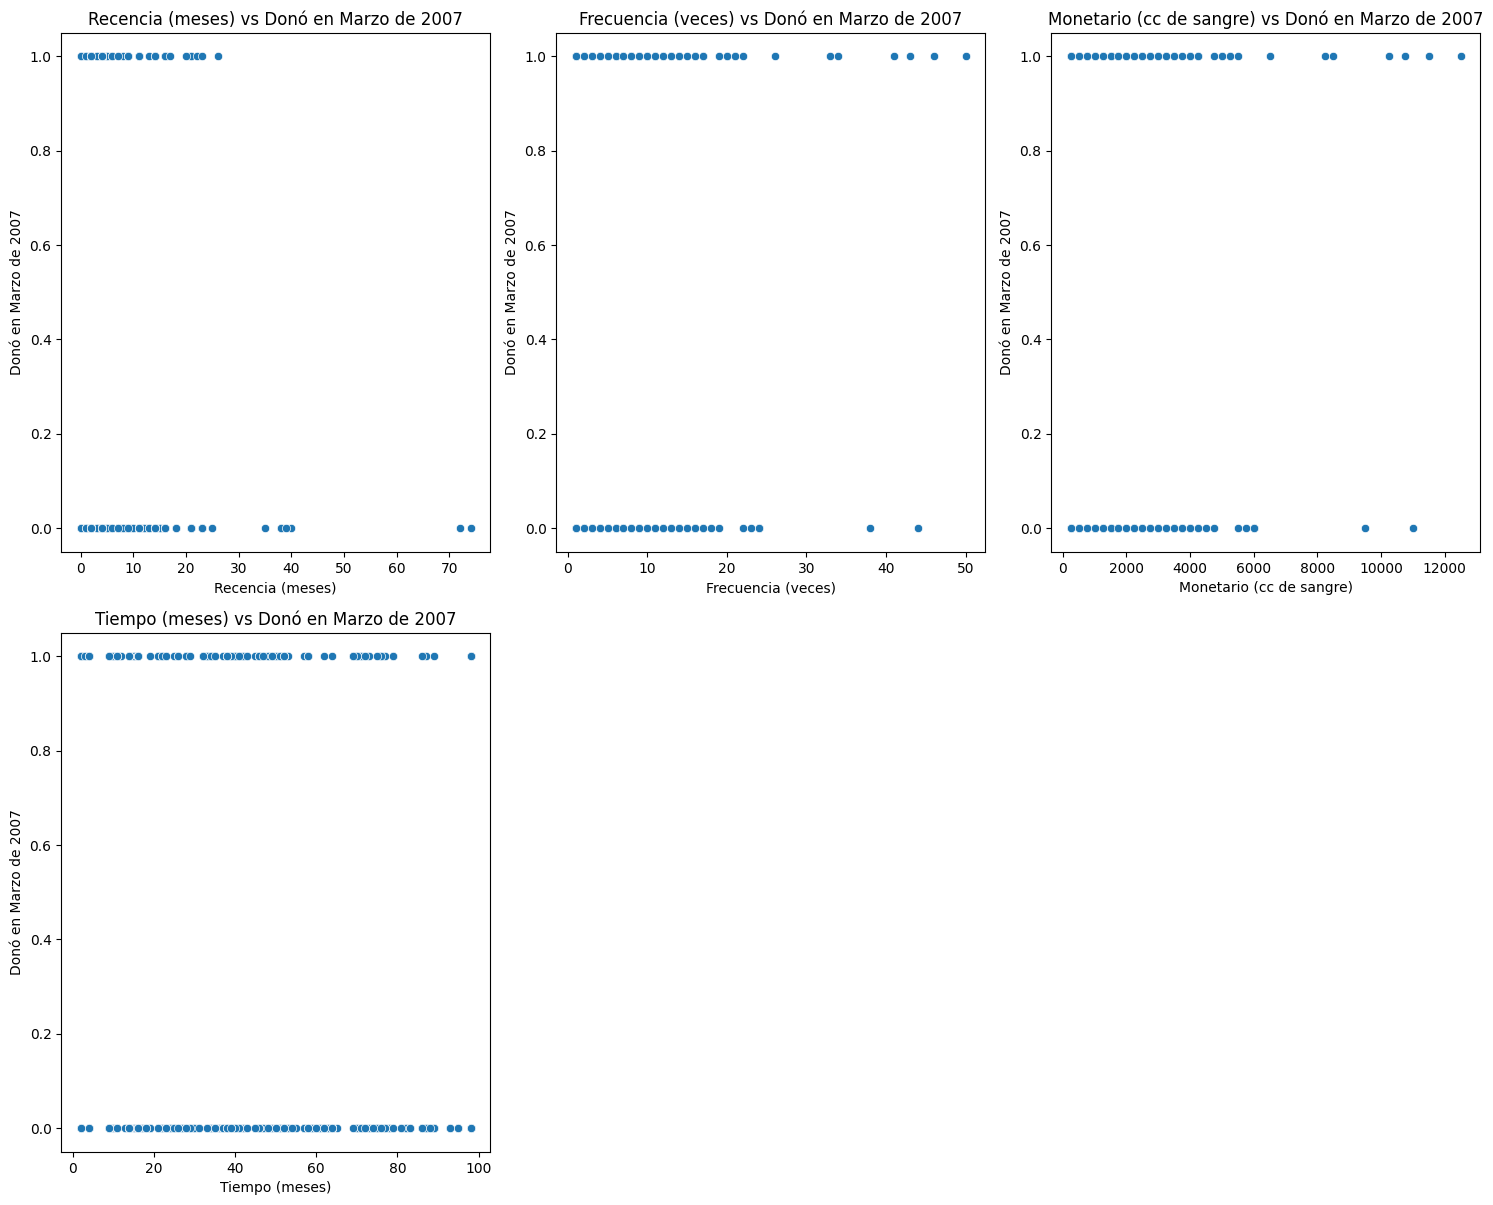

In [47]:
# Contar la cantidad de características a graficar
num_features = len(features)  # 19 características
num_cols = 3  # Número de columnas fijo
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgráficos ajustados
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de índice
axes = axes.flatten()

# Iterar sobre cada feature y graficarla
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}")

# Ocultar subgráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gráficos sobrantes

plt.tight_layout()
plt.show()

No se observa grandes diferencia en las columnas con respecto a las personas que donaron y no donaron en Marzo de 2007, salvo en la columna Tiempo (meses) que es el perido de seguimiento por lo que se observa que las personas que no donaron en Marzo de 2007 tuvieron mas seguimientos que los que si donaron.

## Correlación

Donó en Marzo de 2007       1.000000
Monetario (cc de sangre)    0.218633
Frecuencia (veces)          0.218633
Recencia (meses)           -0.279869
Name: Donó en Marzo de 2007, dtype: float64


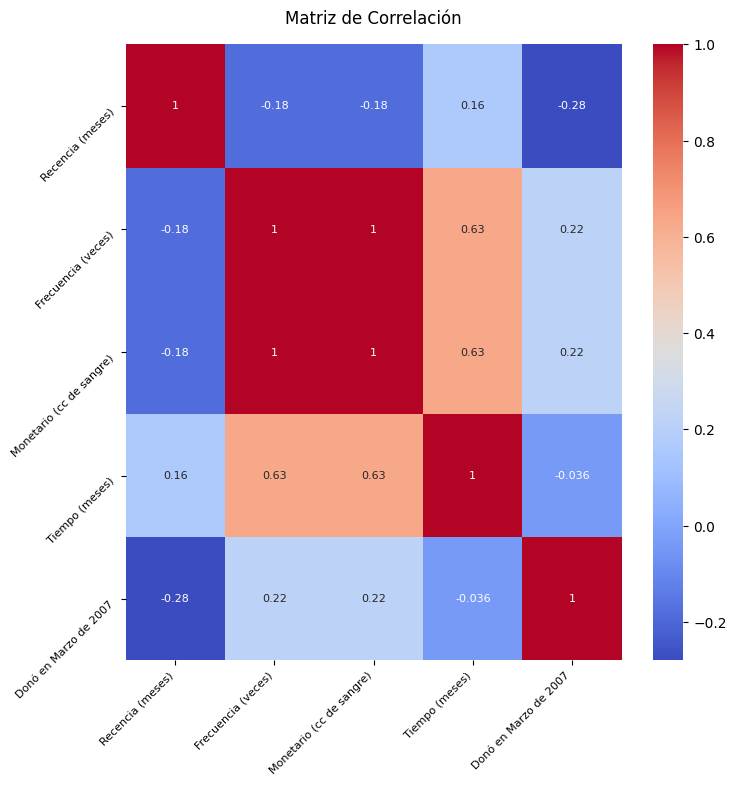

In [48]:
correlation = df.corr()

threshold = 0.1  # Umbral mínimo de correlación
selected_corr = correlation[abs(correlation["Donó en Marzo de 2007"]) > threshold]["Donó en Marzo de 2007"]
print(selected_corr.sort_values(ascending=False))

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados
plt.show()

Se observa que las columnas que mas se correlaciones con la columna "Dono en Marzo de 2007" son "Recencia", "Frecuencia" y "Monetario"

Aunque en la columna tiempo(meses) se observa que tiene una fuerte correlación entre Frecuencia y Monetario, lo que sugiere que las personas que donaron con mas cantidad de veces y mas cantidad de cc de sangre, tuvieron mayor seguimiento

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

## 3.1. Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).

In [49]:
# Verificación de valore nulos
df.isnull().sum()

,0
Recencia (meses),0
Frecuencia (veces),0
Monetario (cc de sangre),0
Tiempo (meses),0
Donó en Marzo de 2007,0


El dataset no tiene valores nulos

## 3.2. Limpieza: indique cuáles features descarta. Justifique.

No se descarta ninguna variable ya que hay columnas que se correlacionan indirectamente con la variable objetivo y el eliminarlas puede modificar el resultado de las varibles que estan directamente relacionadas con la variable objetivo.

## 3.3. Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.

El dataset utilizado no contiene variables dummies

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## 3.4. Detalles del dataframe

- N° de Variables: 5
- N° de Instancias: 748

- Dado que la variable objetivo Donó en Marzo de 2007, tiene solo 2 posibles valores "si" o "no", por lo que es un problema de clasificación binaria.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif


In [51]:
# Separacion de datos en entrenamiento y testeo

# Se divide el conjunto de datos en y (target) y X (features).
X = df.drop(columns=["Donó en Marzo de 2007"]).values
y = df["Donó en Marzo de 2007"].values

# Se dividen los datos en train/test, siendo 70% de los datos para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# .shape muestra cuantos datos se partieron para entrenamiento y cuantos para prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (523, 4)
Tamaño del conjunto de prueba: (225, 4)


In [52]:
# Preprocesamiento de Imputación y escalado
scaler = StandardScaler()  # Escalador que estandariza los datos (media = 0, desviación estándar = 1)

# Aplicamos el preprocesamiento a los datos de entrenamiento y prueba
X_train = scaler.fit_transform(X_train)  # escala X_train
X_test = scaler.transform(X_test)  # escala X_test

# Diccionario de modelos a probar
models = {
    "Regresión Logística": LogisticRegression(random_state=42),  # Modelo de regresión logística
    "SVM": SVC(kernel='rbf', random_state=42)  # Modelo de SVM con kernel radial (RBF)
}

# Evaluación de modelos
accuracies = {}  # Diccionario para almacenar la precisión de cada modelo

for name, model in models.items():  # Iteramos sobre los modelos en el diccionario
    model.fit(X_train, y_train)  # Entrenamos el modelo con los datos preprocesados
    y_pred = model.predict(X_test)  # Hacemos predicciones con X_test
    accuracies[name] = accuracy_score(y_test, y_pred)  # Calculamos la precisión y la almacenamos

    print(f"{name}: Precisión = {accuracies[name]:.4f}")  # Imprimimos la precisión del modelo

# Selección del mejor modelo
best_model_name = max(accuracies, key=accuracies.get)  # Buscamos el modelo con mayor precisión
best_model = models[best_model_name]  # Guardamos el modelo con mejor rendimiento

# Imprimimos el mejor modelo y su precisión
print(f"El mejor modelo para clasificación binaria es: {best_model_name} con una precisión de {accuracies[best_model_name]:.4f}")


Regresión Logística: Precisión = 0.7378
SVM: Precisión = 0.7467
El mejor modelo para clasificación binaria es: SVM con una precisión de 0.7467


Se utilizaron 2 modelos para evaluar cual tiene mejor rendimiento y elegir el que tiene mayor porcentaje de presición. Dando como mejor resultados el modelo de Maquina de Soporte Vertorial.

## Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Definir el modelo
model = SVC(kernel='rbf', random_state=42)

# Ejecutar validación cruzada
scores = cross_val_score(model, X, y, cv=10)  # 10 folds

# Mostrar los resultados
print(f"Precisión por fold: {scores}")
print(f"Precisión media: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")


Precisión por fold: [0.74666667 0.76       0.76       0.76       0.74666667 0.76
 0.76       0.77333333 0.77027027 0.77027027]
Precisión media: 0.7607
Desviación estándar: 0.0086


- Se observa que la presición de cada fold en el modelo de SVM se observa que es mas estable y tiene una variacón muy pequeña que tambien demuestra que generaliza bastante bien en los datos, reduciendo el riesgo de sobreajuste.

- Hay una presición del modelo del 76%, lo que indica que el modelo tiene un buen rendimiento.

- En la desviación estandar se observa que es muy pequeña y nos sugiere que su rendimiento no varia mucho con respecto a diferentes datos.




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [55]:
# Se vuelve a cargar todo para mejor entendimiento.

# Se divide el conjunto de datos en y (target) y X (features).
X = df.drop(columns=["Donó en Marzo de 2007"]).values
y = df["Donó en Marzo de 2007"].values

# Se dividen los datos en train/test, siendo 70% de los datos para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# .shape muestra cuantos datos se partieron para entrenamiento y cuantos para prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (523, 4)
Tamaño del conjunto de prueba: (225, 4)


### 4.1 Entrenamiento y evaluación

In [56]:
# Crear el clasificador
clf = LogisticRegression()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [57]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar las métricas
print(f"Exactitud (Accuracy): {accuracy}")
print(f"Precisión (Precision): {precision}")
print(f"Recall (Sensibilidad): {recall}")
print(f"F1 Score: {f1}")

Matriz de confusión:
[[161   4]
 [ 55   5]]
Exactitud (Accuracy): 0.7377777777777778
Precisión (Precision): 0.5555555555555556
Recall (Sensibilidad): 0.08333333333333333
F1 Score: 0.14492753623188406


- Se observa lo siguiente en la matriz de confusión:
-- VP = 161: el modelo predijo correctamente valores positivos
-- FP = 55: El modelo predijo datos como positivos cuando eran negativas
-- VN = 5: El modelo predijo los datos correctamente.
-- FN = 4: El modelo predijo datos como negativos cuando eran positivos

- Exactitud (Accuracy): Se observa que el modelo predice el 74% tanto para los positivos como los negativos

- Precisión (Precision): la calidad de las predicciones positivas del modelo es del 56%.

- Recall (Sensibilidad): La capasidad del modelo para detectar la clase positiva es del 8%

- F1 Score: 14% Es bastante bajo lo que sugiere que el modelo esta teniendo dificultades para equilibrar recall y presición, el modelo no esta clasificando efectivamente las clases positivas y negativas


## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

## Maquina de Soporte Vectorial (SVM)

In [58]:
# Separacion vuelve a cargar todo para mejor entendimiento.

# Se divide el conjunto de datos en y (target) y X (features).
X = df.drop(columns=["Donó en Marzo de 2007"]).values
y = df["Donó en Marzo de 2007"].values

# Se dividen los datos en train/test, siendo 70% de los datos para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# .shape muestra cuantos datos se partieron para entrenamiento y cuantos para prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (523, 4)
Tamaño del conjunto de prueba: (225, 4)


In [59]:
# Escalado de los datos para mejorar el rendimiento de SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta y transforma X_train
X_test = scaler.transform(X_test)  # Transforma X_test usando los parámetros de entrenamiento


### 5.2 Entrenamiento del modelo.

In [60]:
# Crear el clasificador SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

### 5.3 Evaluación del desempeño

Precisión: 0.7467
F1-score: 0.1972

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       165
           1       0.64      0.12      0.20        60

    accuracy                           0.75       225
   macro avg       0.69      0.55      0.52       225
weighted avg       0.72      0.75      0.68       225



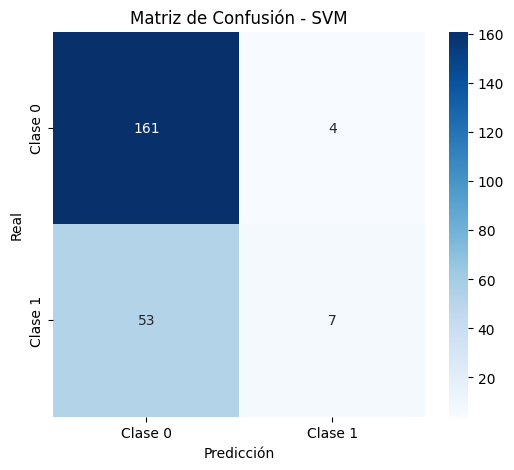

In [61]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Realizar predicciones
y_pred = svm_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precisión: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()


## Clase 0
- Precisición: El modelo tiene un 75% de presición sobre los elementos positivos.

- Recall: El modelo ha identificado un 89% de de datos verdaderos positovos en esta clase

- F1 Score: Hay un 85% de balance entre recall y presición.

Total de elemenetos procesados en esa clase: 165

## Clase 1
- Precisición: El modelo tiene un 64% de presición sobre los elementos positivos.

- Recall: El modelo ha identificado un 12% de datos verdaderos positovos en esta clase, lo cual es muy bajo, por lo que sugiere que ha identificiación ha sido muy mala.

- F1 Score: Hay un 20% de balance entre recall y presición, lo cual es muy bajo, esto sugiere que los datos estan desbalanceados o hay muy pocas muestras en esta clase.

Total de elemenetos procesados en esa clase: 60


## Accuracy
- El modelo clasificó correctamente el 75% de los ejemplos en el conjunto de prueba.

## Macro avg
- 0.69: Precisión promedio entre clases (qué tan bien clasifica cada una)
- 0.55: Recall promedio entre clases (qué tan bien identifica los positivos)
- 0.52: F1-score promedio (balance entre precisión y recall).

El modelo no tiene buen recall (detección de positivos), lo que indica que la clase 1 está siendo difícil de predecir.

## weighted avg
- 0.72: Precisión ponderada, donde la clase 0 tiene más peso      
- 0.75: Recall ponderado, favoreciendo la clase 0
- 0.68: F1-score ponderado, afectado por el desbalance de clases.

Como hay más muestras de la clase 0, el modelo parece optimizado para detectar la clase mayoritaria y tiene dificultades con la clase 1

## Matriz de confusión

- Se observa lo siguiente en la matriz de confusión:
-- VP = 161: el modelo predijo correctamente valores positivos
-- FP = 53: El modelo predijo datos como positivos cuando eran negativas
-- VN = 7: El modelo predijo los datos correctamente.
-- FN = 4: El modelo predijo datos como negativos cuando eran positivos

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el modelo base SVM
svm = SVC(kernel='rbf', random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores de C para probar
    'gamma': [0.001, 0.01, 0.1, 1],  # Valores de gamma
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Ejecutar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor F1-score obtenido en validación cruzada: {grid_search.best_score_:.4f}")

# Guardar el mejor modelo encontrado
best_svm = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred = best_svm.predict(X_test)
final_f1_score = f1_score(y_test, y_pred)

print(f"F1-score final en test: {final_f1_score:.4f}")


# Utilización de copilot en el siguiente bloque de codigo para encontrar el mejor c y gamma.

# promt: hazme el codigo para encontrar el mejor c y gamma para el modelo SVM


Mejores hiperparámetros: {'C': 10, 'gamma': 1}
Mejor F1-score obtenido en validación cruzada: 0.4011
F1-score final en test: 0.4270


In [63]:
# Modifico hiperparámetros en SVM
svm_model = SVC(kernel='rbf', C=10, gamma=1, random_state=42)
# C=10 Controla la penalización de los errores (valores altos pueden sobreajustar el modelo)
# gamma=0.01 Ajusta la influencia de cada muestra en la clasificación.

# Entrenar el modelo con los nuevos hiperparámetros
svm_model.fit(X_train, y_train)


SVC(C=10, gamma=1, random_state=42)

Precisión: 0.7733
F1-score: 0.4270

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       165
           1       0.66      0.32      0.43        60

    accuracy                           0.77       225
   macro avg       0.72      0.63      0.64       225
weighted avg       0.75      0.77      0.74       225



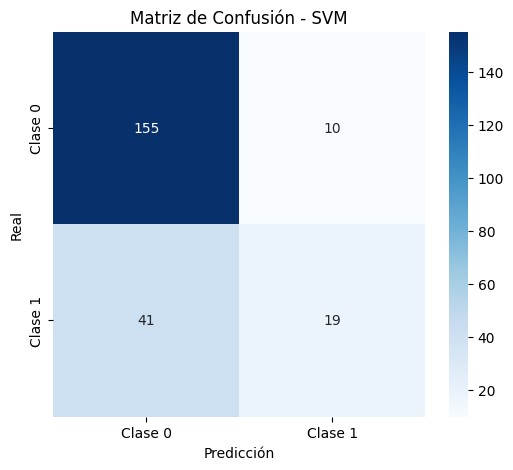

In [64]:
# Realizar predicciones
y_pred = svm_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precisión: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()

## Clase 0
- Precisición: El modelo tiene un 79% de presición sobre los elementos positivos.

- Recall: El modelo ha identificado un 94% de de datos verdaderos positovos en esta clase

- F1 Score: Hay un 86% de balance entre recall y presición.

Total de elemenetos procesados en esa clase: 165

## Clase 1
- Precisición: El modelo tiene un 66% de presición sobre los elementos positivos.

- Recall: El modelo ha identificado un 32% de datos verdaderos positovos en esta clase, lo cual es muy bajo, por lo que sugiere que ha identificiación ha sido muy mala.

- F1 Score: Hay un 43% de balance entre recall y presición, lo cual es muy bajo, esto sugiere que los datos estan desbalanceados o hay muy pocas muestras en esta clase.

Total de elemenetos procesados en esa clase: 60


## Accuracy
- El modelo clasificó correctamente el 77% de los ejemplos en el conjunto de prueba.

## Macro avg
- 0.72: Precisión promedio entre clases (qué tan bien clasifica cada una)
- 0.63: Recall promedio entre clases (qué tan bien identifica los positivos)
- 0.64: F1-score promedio (balance entre precisión y recall).

El modelo no tiene buen recall (detección de positivos), lo que indica que la clase 1 está siendo difícil de predecir.

## weighted avg
- 0.75: Precisión ponderada, donde la clase 0 tiene más peso      
- 0.77: Recall ponderado, favoreciendo la clase 0
- 0.74: F1-score ponderado, afectado por el desbalance de clases.

Como hay más muestras de la clase 0, el modelo parece optimizado para detectar la clase mayoritaria y tiene dificultades con la clase 1

## Matriz de confusión

- Se observa lo siguiente en la matriz de confusión:
-- VP = 155: El modelo predijo correctamente valores positivos
-- FP = 41: El modelo predijo datos como positivos cuando eran negativas
-- VN = 19: El modelo predijo los datos correctamente.
-- FN = 10: El modelo predijo datos como negativos cuando eran positivos

## 6- Conclusiones

- Modificar correctamente los hiperparámetros ayuda grandemente al modelo a mejorar las clasificación, se observan valores muchos mas altos de F1 score, lo cual sugiere que hay un mayo equilibro entre presición y recall.

- Hubieron diferencias en la matriz de confusión, no notorias pero si el modelo confundio un poco mas los falsos negativos y positivos.

- Análizando cada clase se observa que la clase 1 sigue arrojando valores muy bajos, lo que sugiere el modelo que esa clase cuenta con muy pocos datos a diferencia de la clase 0, por lo que al momento de clasificar puede estar asumiendo mejor la clase 0.

- Teniendo en cuenta el Accuracy 0.77 el modelo entrenado con SVM mejoró 2% con respecto al modelo de regresión logística. Donde el modelo puede generalizar bastante bien con un 77% de presición.

# Referencias

Copilot

Prompt = crea el codigo para encontrar el mejor c y gamma para el modelo SVM

tambien comentado en el bloque de código